# Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import functions
import numpy as np

In [2]:
# raw data
df = pd.read_csv('dataframes/pos_df.csv')
df.sample(3)

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
4287,HexCer 42:1;2 (LCB 17:0;2-2H2O),0.0,0.0,0.0,0.0,4.9063,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,34.0,0.0
4786,GM1 46:0;4 (LCB 18:0;2-2H2O),0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2267,NAPE 36:11+NH4 (-NAPE (16:0 NH4)),0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,...,22.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# experiment metadata
df_exps = pd.read_csv('dataframes/pos_df_exps.csv')
df_exps.sample(3)

,Exp,Mutation
26,Flot2-B,Flot2
18,CERS2-1g_B,CERS2-1g
38,WT_A,WT


In [4]:
# lipid metadata
df_meta2 = pd.read_csv('dataframes/pos_lipids_df_meta2.csv')
df_meta2.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2,Unsaturation 2
2587,PC 40:9 (LPC),PC,40,9,PC,>=3
3043,SGalCer 42:2;3 (LCB 18:0;2-H2O),SGalCer,42,2,SGalCer,2
2172,PS 40:5 (FA 18:2),PS,40,5,PS,>=3


In [5]:
# reformat columns
df_p = functions.df_p(df, df_exps)
df_p.columns

Index(['CAS9', 'CAS9', 'CAS9', 'CAS9', 'CAV', 'CAV', 'CAV', 'CAV', 'CAVIN',
       'CAVIN', 'CAVIN', 'CAVIN', 'CERS2_mg', 'CERS2_mg', 'CERS2_mg',
       'CERS2_mg', 'CERS2-1g', 'CERS2-1g', 'CERS2-1g', 'CERS2-1g', 'CERS5',
       'CERS5', 'CERS5', 'CERS5', 'Flot2', 'Flot2', 'Flot2', 'Flot2', 'RAJU',
       'RAJU', 'SPTLC', 'SPTLC', 'SPTLC', 'SPTLC', 'UGCG', 'UGCG', 'UGCG',
       'UGCG', 'WT', 'WT', 'WT', 'WT'],
      dtype='object', name='Mutation')

# Fold Change Heatmaps

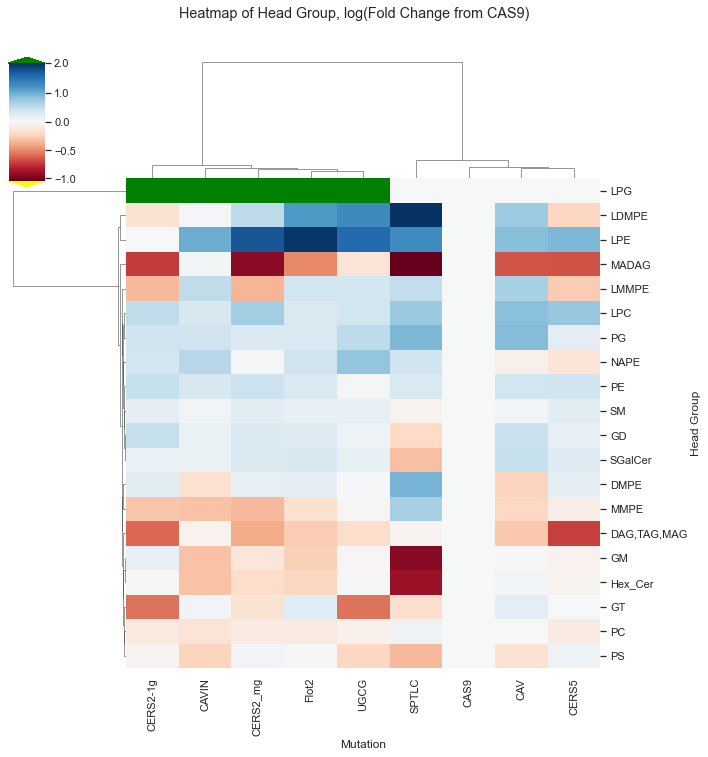

In [6]:
# head group
h_fold, hmax, hmin = functions.fold_change(df_meta2,
                                           df_p,
                                           var='Head Group 2',
                                           renamed_var='Head Group',
                                           mtn='CAS9',
                                           drop_mutation=['WT', 'RAJU'],
                                           row_cluster=True,
                                           outlier=True,
                                           cbar_args={'vmax' : 2, 'tmax': 2}
                                          )

/Users/madhunarendran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


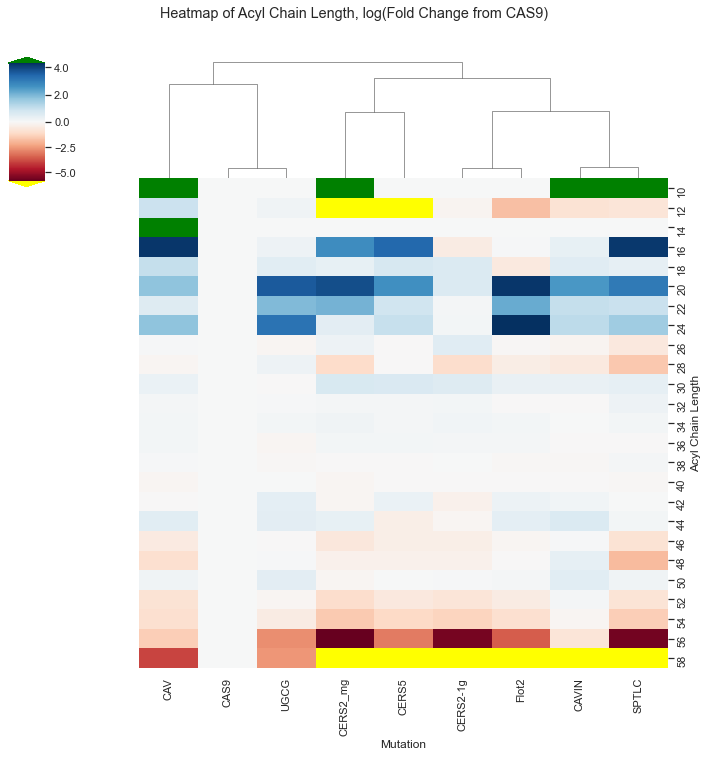

In [7]:
# chain length
cl_fold, clmax, clmin = functions.fold_change(df_meta2,
                                           df_p,
                                           var='Acyl Chain Length',
                                           mtn='CAS9',
                                           drop_mutation=['WT', 'RAJU'],
                                           drop_var=list(range(1,70,2)),
                                           row_cluster=False,
                                           outlier=True,
                                          )

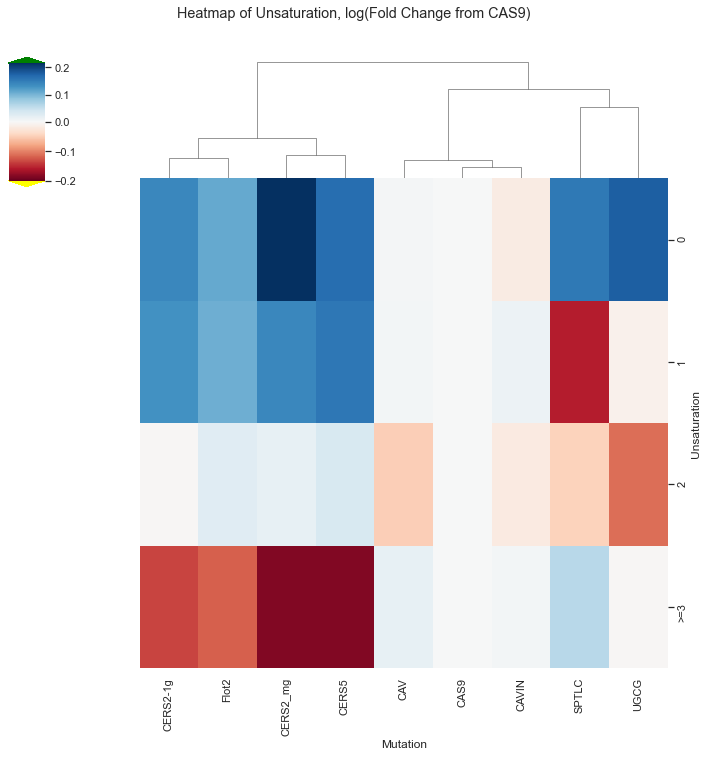

In [8]:
# unsaturation
u_fold, umax, umin = functions.fold_change(df_meta2,
                                           df_p,
                                           var='Unsaturation 2',
                                           renamed_var='Unsaturation',
                                           mtn='CAS9',
                                           drop_mutation=['WT', 'RAJU'],
                                           row_cluster=False,
                                           outlier=True,
                                           cbar_args={'vmin':-0.2, 'tmin':-0.2}
                                          )

# One-Way ANOVA

In [33]:
from scipy.stats import f_oneway

In [9]:
# import odds data
df_odds = pd.read_csv('dataframes/pos_df_odds.csv')
df_odds.head()

,Mutation,odd,even
0,CAS9,0.025079,0.974921
1,CAS9,0.035813,0.964187
2,CAS9,0.025719,0.974281
3,CAS9,0.040462,0.959538
4,CAV,0.019239,0.980761


In [40]:
df_odds_agg = df_odds[['Mutation','odd']].groupby('Mutation', as_index=True).odd.apply(np.array)
df_odds_agg.head()

Mutation
CAS9        [0.0250790916946102, 0.0358128216430987, 0.025...
CAV         [0.0192387792134248, 0.0127705079775463, 0.020...
CAVIN       [0.0332286531888394, 0.0333678006749146, 0.036...
CERS2-1g    [0.0249991304634732, 0.0199930855972587, 0.021...
CERS2_mg    [0.0133687904173157, 0.0266619565989788, 0.028...
Name: odd, dtype: object

In [49]:
print(*df_odds_agg)

[0.02507909 0.03581282 0.02571877 0.04046224] [0.01923878 0.01277051 0.02022906 0.02078622] [0.03322865 0.0333678  0.03625956 0.03178837] [0.02499913 0.01999309 0.02185855 0.02062182] [0.01336879 0.02666196 0.02873482 0.02687406] [0.02294828 0.01912686 0.02374499 0.02365047] [0.0289843  0.03073564 0.03233896 0.03463304] [0.03144209 0.01281677 0.03160594 0.03039399] [0.02852444 0.03214696 0.03941527 0.04029798] [0.03583028 0.03781113 0.04232463 0.04344322]


In [54]:
print('F-statistic and p-value for percentage of odd chain lengths between mutations')
f_oneway(*df_odds_agg)

F-statistic and p-value for percentage of odd chain lengths between mutations


F_onewayResult(statistic=7.076233841749475, pvalue=2.000814631749214e-05)

# Two-Way ANOVA

In [11]:
h_fold

Mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG
Head Group,,,,,,,,,
"DAG,TAG,MAG",0.0,-0.282691,-0.043218,-0.599871,-0.386413,-0.715837,-0.268242,-0.032248,-0.188603
DMPE,0.0,-0.242770,-0.166233,0.223077,0.156699,0.192375,0.192964,0.922671,0.016645
GD,0.0,0.448736,0.132256,0.474241,0.302562,0.172800,0.263871,-0.203803,0.115445
GM,0.0,-0.004383,-0.302800,0.174549,-0.126973,-0.048315,-0.250496,-0.951350,-0.011393
GT,0.0,0.207254,0.068952,-0.569428,-0.149558,0.009975,0.242873,-0.174724,-0.566580
Hex_Cer,0.0,0.077027,-0.305554,-0.001035,-0.189664,-0.035026,-0.224468,-0.902418,-0.006647
LDMPE,0.0,0.720761,0.045215,-0.147404,0.517224,-0.223618,1.143558,1.970071,1.275620
LMMPE,0.0,0.665006,0.510964,-0.334402,-0.358280,-0.265083,0.375996,0.496699,0.365797
LPC,0.0,0.839138,0.332195,0.508120,0.689497,0.773437,0.309753,0.737954,0.387949
